In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

In [2]:
df = pd.read_csv("군집 결과-class.csv", index_col=0)

In [21]:
df

,법정동,치안,여가,일반음식점,보건,편의시설,대중교통,카페,술집,군집
0,청운동,2,1,1,1,1,2,1,1,0
1,신교동,2,1,1,1,1,1,1,1,0
2,궁정동,1,1,1,1,1,1,1,1,0
3,효자동,1,1,1,1,1,1,1,1,0
4,창성동,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,3,3,2,3,3,3,3,2,4
461,암사동,3,3,3,3,3,3,3,2,4
462,성내동,3,3,3,3,3,3,3,2,4
463,천호동,3,3,3,3,3,3,3,2,4


In [4]:
df1 = df.drop(axis=1, columns=['법정동', '군집'])

In [5]:
df1

,치안,여가,일반음식점,보건,편의시설,대중교통,카페,술집
0,2,1,1,1,1,2,1,1
1,2,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
460,3,3,2,3,3,3,3,2
461,3,3,3,3,3,3,3,2
462,3,3,3,3,3,3,3,2
463,3,3,3,3,3,3,3,2


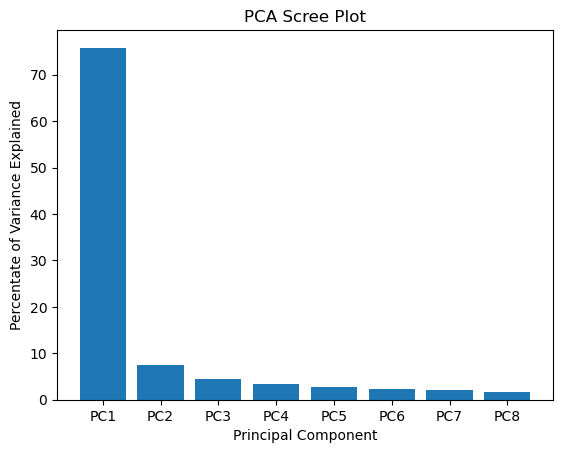

0    0.757996
1    0.833114
2    0.877792
3    0.911196
4    0.938355
5    0.961359
6    0.983391
7    1.000000
dtype: float64

In [18]:
# PCA 주성분분석
pca_test = PCA(random_state=1107)
X_p = pca_test.fit_transform(df1)


percent_variance = np.round(pca_test.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()
pd.Series(np.cumsum(pca_test.explained_variance_ratio_))

In [7]:
pca = PCA(n_components=2, random_state=512)
pc = pca.fit_transform(df1)
pcd = pd.DataFrame(pc)
pcd

,0,1
0,-1.881857,0.831773
1,-2.247540,0.624761
2,-2.543448,-0.246328
3,-2.543448,-0.246328
4,-2.543448,-0.246328
...,...,...
460,2.446748,0.383714
461,2.820155,0.157312
462,2.820155,0.157312
463,2.820155,0.157312


In [22]:
df['군집'].value_counts()

0    129
4    115
6     59
3     53
5     40
2     36
1     33
Name: 군집, dtype: int64

In [24]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(df1, df['군집'], test_size=0.2, random_state=30, stratify=df['군집'])
X_train.shape, X_test.shape

((372, 8), (93, 8))

In [10]:
n_range = range(2, 11)
k_range = range(2, 31)

# 결과를 저장할 리스트 초기화
results = []

# 교차 검증 및 KNN 분류기에 대해 반복 실행
for n in n_range:
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        stratified_kfold = StratifiedKFold(n_splits=n)
        scores = cross_val_score(knn, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
        # 평균 점수와 함께 n과 k 저장
        results.append((n, k, scores.mean()))

# 최적의 결과 찾기 (가장 높은 정확도를 가진 조합)
best_n, best_k, best_score = max(results, key=lambda x: x[2])
print(f"Best n: {best_n} and Best k: {best_k} with Accuracy: {best_score}")

Best n: 4 and Best k: 3 with Accuracy: 0.8413978494623656


In [11]:
train_acc = []
train_err = []
test_acc = []
test_err = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)

    train_acc.append(train_score)
    train_err.append(np.mean(train_pred != y_train))
    test_acc.append(test_score)
    test_err.append(np.mean(test_pred != y_test))

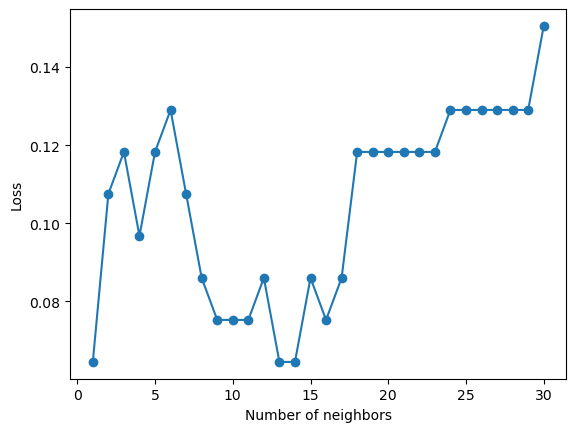

In [12]:
plt.plot(range(1, 31), test_err, marker='o')
plt.xlabel('Number of neighbors')
plt.ylabel('Loss')
plt.show()

In [17]:
test_err[12]

0.06451612903225806

In [25]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         7
           3       1.00      0.73      0.84        11
           4       0.96      1.00      0.98        23
           5       1.00      1.00      1.00         8
           6       1.00      0.83      0.91        12

    accuracy                           0.94        93
   macro avg       0.97      0.91      0.94        93
weighted avg       0.94      0.94      0.93        93



In [14]:
print(confusion_matrix(y_test, pred))

[[26  0  0  0  0  0  0]
 [ 0  5  0  0  1  0  0]
 [ 0  0  7  0  0  0  0]
 [ 3  0  0  8  0  0  0]
 [ 0  0  0  0 23  0  0]
 [ 0  0  0  0  0  8  0]
 [ 2  0  0  0  0  0 10]]


<AxesSubplot:>

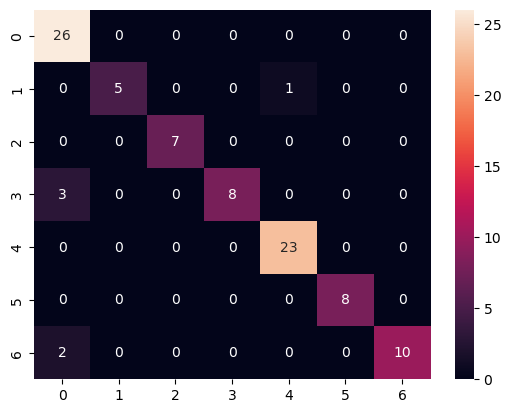

In [30]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, pred), annot=True)

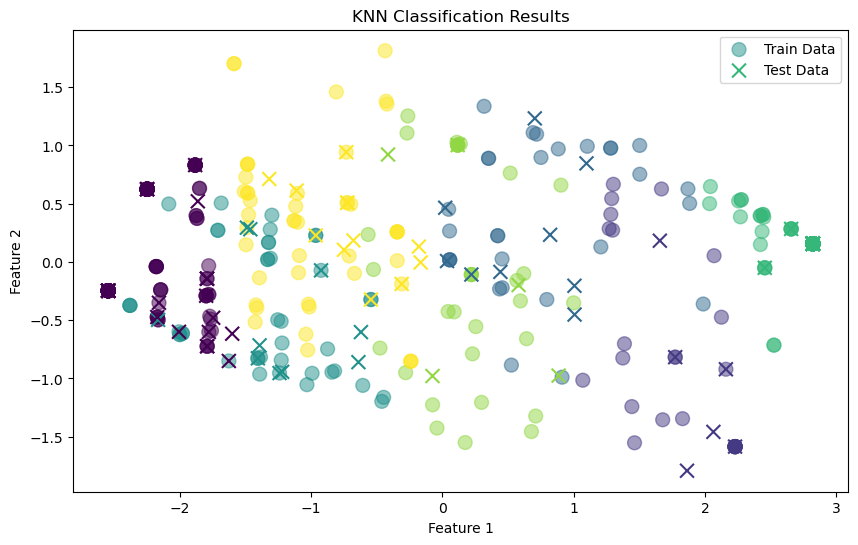

In [15]:
# scatter plot을 사용한 시각화
plt.figure(figsize=(10, 6))
# 학습 데이터 시각화
plt.scatter(X_train[0], X_train[1], c=y_train, marker='o', s=100, alpha=0.5, label='Train Data')
# 테스트 데이터 시각화
plt.scatter(X_test[0], X_test[1], c=pred, marker='x', s=100, label='Test Data')

plt.title('KNN Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [16]:
pcd['label'] = df['군집']

In [34]:
# 새로운 데이터 포인트
# new_point = np.array([[3, 3, 2, 3, 3, 3, 3, 2]])  # 새로운 데이터 포인트 예시

# # 1. PCA 변환
# new_point_pca = pca.transform(new_point)

# 2. KNN 분류하여 라벨 예측
predicted_label = knn.predict(new_point_pca)

# 3. 같은 라벨을 가진 데이터 포인트들 중에서 가장 가까운 5개 선택
# 학습 데이터 중 예측된 라벨에 해당하는 데이터만 필터링
filtered_points = pcd[pcd['label'] == predicted_label[0]]

# NearestNeighbors를 사용하여 거리 계산 및 가장 가까운 5개 포인트 찾기
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(filtered_points.drop(axis=1, columns=['label']))
distances, indices = neigh.kneighbors(new_point_pca)

# 가장 가까운 5개의 데이터 포인트 출력
closest_points = filtered_points.iloc[indices[0]]
print("가장 가까운 5개의 데이터 포인트:", closest_points)

D:\User\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KNeighborsClassifier is expecting 8 features as input.

In [18]:
index = closest_points.index

In [19]:
x = df.iloc[index].transpose()
x

,460,223,227,406,275
법정동,둔촌동,제기동,청량리동,대림동,석관동
치안,3,3,3,3,3
여가,3,3,3,2,2
일반음식점,2,3,3,3,3
보건,3,3,3,3,3
편의시설,3,3,3,3,3
대중교통,3,3,3,3,3
카페,3,2,2,3,3
술집,2,2,2,2,2
군집,4,4,4,4,4


In [20]:
import os

path = "../fastapi/fastapi_server"

# 경로가 존재하지 않는 경우, 생성
if not os.path.exists(path):
    os.makedirs(path)

# 모델 저장
# joblib.dump(pca, f'{path}/pca_model.joblib')
joblib.dump(knn, f'{path}/knn_model.joblib')

['../fastapi/fastapi_server/knn_model.joblib']